## RDKit Similarity Search Tutorial

This Jupyter notebook tutorial guides you through performing similarity searches using RDKit in Python. We'll explore different fingerprinting methods and metrics to compare molecules.

**Prerequisites:**

* Install RDKit (if not already installed). You can install RDKit using conda:

```bash
conda install -c rdkit rdkit
pip install rdkit
```

**Import Libraries:**

In [1]:
# Import necessary libraries from RDKit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys, AllChem, rdFingerprintGenerator, rdMolDescriptors, rdFMCS
from rdkit.DataStructs import TanimotoSimilarity, DiceSimilarity, BulkTanimotoSimilarity

**1. Fingerprint-Based Similarity**

Fingerprints are molecular representations used for similarity comparisons. Here, we'll explore different fingerprint types:

**1.1. MACCS Keys**

MACCS keys are a set of predefined substructures used to fingerprint molecules.

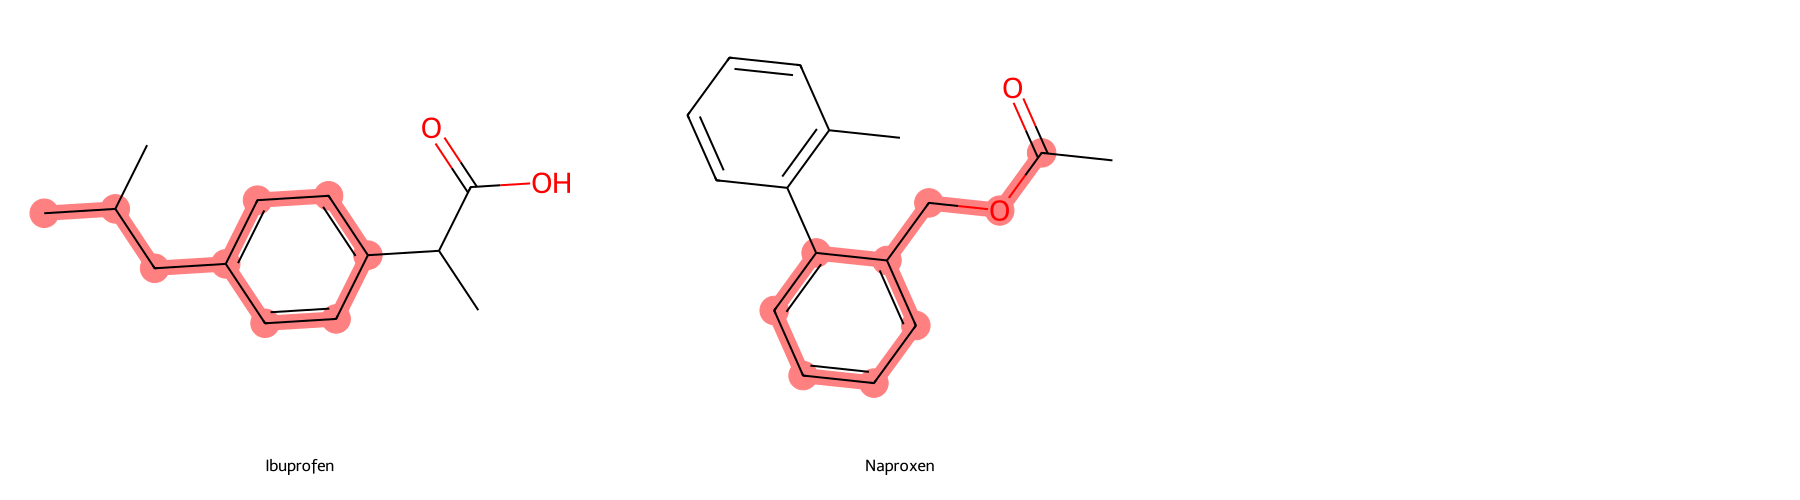

MACCS Keys Tanimoto Similarity: 0.4583333333333333


In [2]:
# Define molecules
mol1 = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
mol2 = Chem.MolFromSmiles('CC1=C(C=CC=C1)C2=CC=CC=C2COC(=O)C')

# Generate MACCS keys
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

# Find the maximum common substructure
mcs_result = rdFMCS.FindMCS(
    [mol1, mol2], completeRingsOnly=True, threshold=0.8, ringMatchesRingOnly=False, 
    atomCompare=rdFMCS.AtomCompare.CompareAny, bondCompare=rdFMCS.BondCompare.CompareAny, 
    matchValences=True, timeout=60, verbose=True)
common_substructure = Chem.MolFromSmarts(mcs_result.smartsString)

# Highlight common substructure
highlight_atoms1 = mol1.GetSubstructMatch(common_substructure)
highlight_atoms2 = mol2.GetSubstructMatch(common_substructure)

# Draw molecules with highlighted common substructure
img = Draw.MolsToGridImage(
    [mol1, mol2], 
    legends=['Ibuprofen', 'Naproxen'],
    highlightAtomLists=[highlight_atoms1, highlight_atoms2],
    subImgSize=(600,500)
)

# Display image
from IPython.display import display
display(img)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'MACCS Keys Tanimoto Similarity: {similarity}')

In [3]:
# Required imports
from rdkit import Chem
from rdkit.Chem import Draw, rdFMCS, MACCSkeys, SimilarityMaps
from rdkit.Chem.Draw import IPythonConsole
from rdkit.DataStructs import TanimotoSimilarity
from IPython.display import display

# Define molecules
mol1 = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')  # Ibuprofen
mol2 = Chem.MolFromSmiles('CC1=C(C=CC=C1)C2=CC=CC=C2COC(=O)C')  # Naproxen

# Generate MACCS keys
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

# Find the maximum common substructure
mcs_result = rdFMCS.FindMCS(
    [mol1, mol2], completeRingsOnly=True, threshold=0.8, ringMatchesRingOnly=False, 
    atomCompare=rdFMCS.AtomCompare.CompareAny, bondCompare=rdFMCS.BondCompare.CompareAny, 
    matchValences=True, timeout=60, verbose=True)
common_substructure = Chem.MolFromSmarts(mcs_result.smartsString)

# Highlight common substructure
highlight_atoms1 = mol1.GetSubstructMatch(common_substructure)
highlight_atoms2 = mol2.GetSubstructMatch(common_substructure)

# Draw molecules with highlighted common substructure
img = Draw.MolsToGridImage(
    [mol1, mol2], 
    legends=['Ibuprofen', 'Naproxen'],
    highlightAtomLists=[highlight_atoms1, highlight_atoms2],
    subImgSize=(600, 500)
)

# Display image
display(img)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'MACCS Keys Tanimoto Similarity: {similarity}')

# Generate similarity map for the two molecules using fingerprints
fig1, maxweight1 = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, SimilarityMaps.GetMorganFingerprint)
fig2, maxweight2 = SimilarityMaps.GetSimilarityMapForFingerprint(mol2, mol1, SimilarityMaps.GetMorganFingerprint)

# Display similarity maps
display(fig1)
display(fig2)

ImportError: cannot import name 'SimilarityMaps' from 'rdkit.Chem' (c:\Users\Chamod Peiris\AppData\Local\Programs\Python\Python311\Lib\site-packages\rdkit\Chem\__init__.py)

**1.2. RDKit Fingerprints**

RDKit provides built-in fingerprint generation with customization options.

In [6]:
from rdkit.Chem import AllChem

# Generate RDKit fingerprints
generator = rdFingerprintGenerator.GetRDKitFPGenerator()
fp1 = generator.GetFingerprint(mol1)
fp2 = generator.GetFingerprint(mol2)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'RDKit Fingerprints Tanimoto Similarity: {similarity}')

RDKit Fingerprints Tanimoto Similarity: 0.15445544554455445


**1.3. Morgan Fingerprints**

Morgan fingerprints capture local features of molecules based on a radius.

In [4]:
# Generate Morgan fingerprints (radius 2, 2048 bits)
fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 2, nBits=2048)
fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 2, nBits=2048)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'Morgan Fingerprints Tanimoto Similarity: {similarity}')

Morgan Fingerprints Tanimoto Similarity: 0.17391304347826086


**2. Atom Pair Fingerprints**

These fingerprints encode information about pairs of atoms and their distances.

In [6]:
# Generate Atom Pair fingerprints
fp1 = rdMolDescriptors.GetAtomPairFingerprint(mol1)
fp2 = rdMolDescriptors.GetAtomPairFingerprint(mol2)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'Atom Pair Fingerprints Tanimoto Similarity: {similarity}')

Atom Pair Fingerprints Tanimoto Similarity: 0.1889400921658986


**3. Topological Torsion Fingerprints**

These fingerprints encode sequences of four bonded atoms.

In [7]:
# Generate Topological Torsion fingerprints
fp1 = rdMolDescriptors.GetTopologicalTorsionFingerprint(mol1)
fp2 = rdMolDescriptors.GetTopologicalTorsionFingerprint(mol2)

# Calculate Tanimoto similarity
similarity = TanimotoSimilarity(fp1, fp2)
print(f'Topological Torsion Fingerprints Tanimoto Similarity: {similarity}')

Topological Torsion Fingerprints Tanimoto Similarity: 0.019230769230769232


**4. Dice Similarity**

Dice similarity is another metric for comparing fingerprints, often used with binary fingerprints.

In [8]:
# Generate MACCS keys (used for binary fingerprints)
fp1 = MACCSkeys.GenMACCSKeys(mol1)
fp2 = MACCSkeys.GenMACCSKeys(mol2)

# Calculate Dice similarity
similarity = DiceSimilarity(fp1, fp2)
print(f'MACCS Keys Dice Similarity: {similarity}')

MACCS Keys Dice Similarity: 0.6285714285714286


**5. Bulk Similarity Searches**

For efficiency, you can perform similarity searches against a list of molecules.

In [9]:
# Define a list of molecules (SMILES strings)
mols = [Chem.MolFromSmiles(s) for s in ['CCO', 'CCN', 'CCC']]
fps = [AllChem.GetMorganFingerprintAsBitVect(m, 2) for m in mols]

# Define query molecule
query = Chem.MolFromSmiles('CCO')
query_fp = AllChem.GetMorganFingerprintAsBitVect(query, 2)

# Perform bulk similarity search
similarities = BulkTanimotoSimilarity(query_fp, fps)
print(f'Bulk Tanimoto Similarities: {similarities}')

Bulk Tanimoto Similarities: [1.0, 0.3333333333333333, 0.42857142857142855]


**6. Cosine Similarity Searches**

Measures the cosine of the angle between two vectors.

In [18]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
# Import necessary libraries
# Convert RDKit fingerprints to numpy arrays
fp1_array = np.array(fp1)
fp2_array = np.array(fp2)

# Reshape the arrays
fp1_reshaped = fp1_array.reshape(1, -1)
fp2_reshaped = fp2_array.reshape(1, -1)

# Calculate cosine similarity
similarity = cosine_similarity(fp1_reshaped, fp2_reshaped)
# Calculate cosine similarity
similarity = cosine_similarity(fp1_reshaped, fp2_reshaped)
print(f'Cosine Similarity: {similarity[0][0]}')

Cosine Similarity: 0.5000000000000001


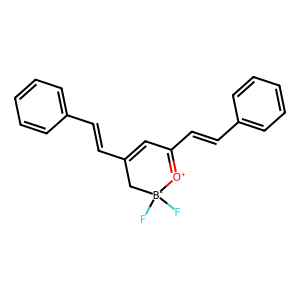

In [14]:
from rdkit import Chem
from rdkit.Chem import Draw

# Corrected SMILES string (example correction)
smiles = 'F[B-]3(F)CC(/C=C/c1ccccc1)=CC(/C=C/c2ccccc2)=[O+]3'
mol = Chem.MolFromSmiles(smiles)

if mol is None:
    print("Invalid SMILES string")
else:
    img = Draw.MolToImage(mol)
    display(img)


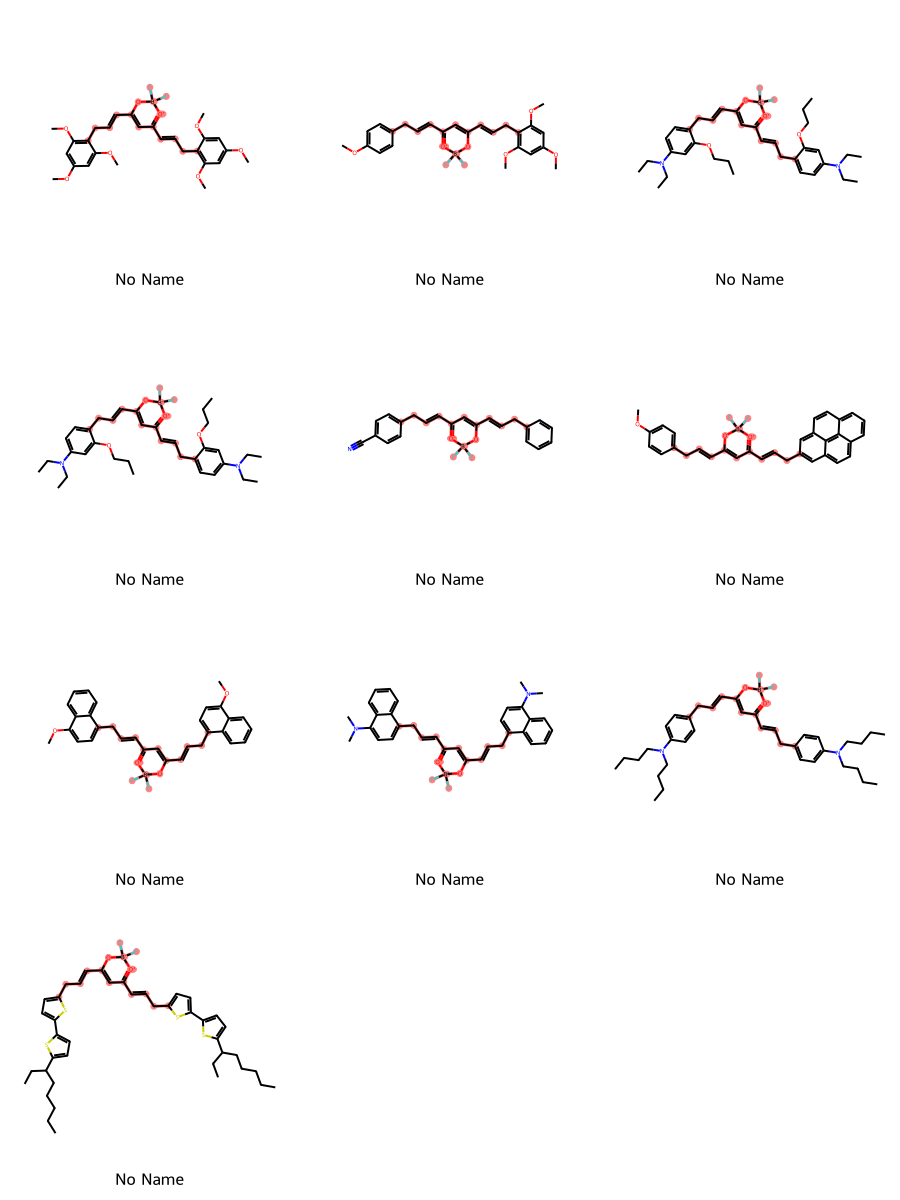

In [29]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdFMCS, Draw

# Example SMILES strings (replace with your list of SMILES)
smiles_list = [
    "COc3cc(OC)c(C/C=C/C2=CC(/C=C/Cc1c(OC)cc(OC)cc1OC)=[O+][B-](F)(F)O2)c(OC)c3",
    "COc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1c(OC)cc(OC)cc1OC)=C2)cc3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "CCCOc1cc(N(CC)CC)ccc1C/C=C/C3=CC(/C=C/Cc2ccc(N(CC)CC)cc2OCCC)=[O+][B-](F)(F)O3",
    "N#Cc3ccc(C/C=C/C2=[O+][B-](F)(F)OC(/C=C/Cc1ccccc1)=C2)cc3",
    "COc6ccc(C/C=C/C5=CC(/C=C/Cc1cc2ccc3cccc4ccc(c1)c2c34)=[O+][B-](F)(F)O5)cc6",
    "COc4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(OC)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CN(C)c4ccc(C/C=C/C3=CC(/C=C/Cc1ccc(N(C)C)c2ccccc12)=[O+][B-](F)(F)O3)c5ccccc45",
    "CCCCN(CCCC)c3ccc(C/C=C/C2=CC(/C=C/Cc1ccc(N(CCCC)CCCC)cc1)=[O+][B-](F)(F)O2)cc3",
    "CCCCCC(CC)c5ccc(c4ccc(C/C=C/C3=CC(/C=C/Cc2ccc(c1ccc(C(CC)CCCCC)s1)s2)=[O+][B-](F)(F)O3)s4)s5"
]

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Generate molecular graphs
graphs = [Chem.RWMol(mol) for mol in molecules]
for i, graph in enumerate(graphs):
    AllChem.Compute2DCoords(graph)

# Find the Maximum Common Substructure (MCS)
mcs = rdFMCS.FindMCS(graphs, matchValences=True, completeRingsOnly=True)

# Get the common substructure as a RDKit molecule
common_substructure = Chem.MolFromSmarts(mcs.smartsString)

# Prepare legends for molecules
legends = []
for mol in molecules:
    if mol.HasProp('_Name'):
        legends.append(mol.GetProp('_Name'))
    else:
        legends.append('No Name')

# Visualize the common substructure
img = Draw.MolsToGridImage(molecules, molsPerRow=round(len(smiles_list)/3), subImgSize=(300, 300),
                           legends=legends, highlightAtomLists=[mol.GetSubstructMatch(common_substructure) for mol in molecules])
display(img)

In [2]:
from rdkit import Chem
from rdkit.Chem.AtomPairs import Pairs
from rdkit.DataStructs import FingerprintSimilarity
from scipy.spatial.distance import cosine
import numpy as np

def fingerprint_to_vector(fp, size=2048):
    vec = np.zeros(size)
    for idx, value in fp.GetNonzeroElements().items():
        vec[idx % size] += value
    return vec

# Example SMILES strings
smiles1 = 'CCCOO'
smiles2 = 'CCN'

# Convert SMILES to RDKit molecule objects
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# Generate atom pair fingerprints
fp1 = Pairs.GetAtomPairFingerprint(mol1)
fp2 = Pairs.GetAtomPairFingerprint(mol2)

# Convert fingerprints to vectors
vec1 = fingerprint_to_vector(fp1)
vec2 = fingerprint_to_vector(fp2)

# Calculate cosine similarity
similarity = 1 - cosine(vec1, vec2)
print(f'Cosine Similarity: {similarity}')

Cosine Similarity: 0.7216878364870323


Tanimoto Similarity: 0.1889


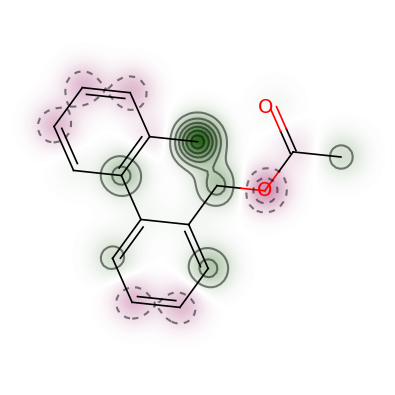

In [18]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import SimilarityMaps
import matplotlib.pyplot as plt

# Define the molecules
mol1 = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')
mol2 = Chem.MolFromSmiles('CC1=C(C=CC=C1)C2=CC=CC=C2COC(=O)C')

# Generate atom pair fingerprints
fp1 = AllChem.GetAtomPairFingerprint(mol1)
fp2 = AllChem.GetAtomPairFingerprint(mol2)

# Calculate Tanimoto similarity
similarity = DataStructs.TanimotoSimilarity(fp1, fp2)
print(f'Tanimoto Similarity: {similarity:.4f}')

fig, maxWeight = SimilarityMaps.GetSimilarityMapForFingerprint(mol1, mol2, SimilarityMaps.GetAPFingerprint)
fig.set_size_inches(1.5, 1.5)
plt.show()